# Census Data Analysis
This code organizes some analysis of the 2010 US census data and visualizations for the initial presentation.

In [151]:
# Packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [114]:
# Ingest the data -- special handling needed to convert numbers into integers
data_folder = ""
census_data = pd.read_csv(f"{data_folder}merged_census_county_data.csv", thousands=',')
census_data['county_name'] = census_data['county_name'].apply(lambda x: x.split(' County')[0])
census_data.head()

,FIPS_Code,state_code,county_name,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1001,AL,Autauga,0.0,54571,54597,54773,55227,54954,54727,...,26281,25561,720,2.7,25838.0,24576.0,1262.0,4.9,58233.0,112.5
1,1003,AL,Baldwin,5.0,182265,182265,183112,186558,190145,194885,...,97424,94713,2711,2.8,96763.0,91338.0,5425.0,5.6,59871.0,115.6
2,1005,AL,Barbour,3.0,27457,27455,27327,27341,27169,26937,...,8502,8177,325,3.8,8587.0,7982.0,605.0,7.0,35972.0,69.5
3,1007,AL,Bibb,0.0,22915,22915,22870,22745,22667,22521,...,8639,8371,268,3.1,8640.0,8067.0,573.0,6.6,47918.0,92.6
4,1009,AL,Blount,0.0,57322,57322,57376,57560,57580,57619,...,25196,24516,680,2.7,24661.0,23653.0,1008.0,4.1,52902.0,102.2


In [124]:
# Correlation of population changes in Texas for areas around Austin, Houston, and San Antonio
filter_column = 'county_name'
filter_values = ['Travis','Houston','Bexar']
field = 'POP_ESTIMATE'

plot_data = census_data[census_data[filter_column].isin(list(filter_values))] \
    .filter(regex='^' + field + '_.*$',axis=1).transpose()
plot_data.reset_index(inplace=True)
plot_data['index'] = pd.to_datetime(plot_data['index'].apply(lambda x: '1/1/' + x.split('_')[-1]))
plot_data.set_index('index', inplace=True)
plot_data.index.rename('Year',inplace=True)

corr = plot_data.pct_change(periods=1).iloc[1:].corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2) \
    .set_caption('Correlation of annual population movements across major Texas population centers')

,34,447,1324,2450,2518,2616,2730
34,1,0.4,-0.32,0.13,-0.27,-0.44,0.46
447,0.4,1,-0.4,0.098,-0.3,-0.25,0.2
1324,-0.32,-0.4,1,-0.29,-0.25,0.21,-0.43
2450,0.13,0.098,-0.29,1,-0.45,0.5,-0.25
2518,-0.27,-0.3,-0.25,-0.45,1,-0.25,0.68
2616,-0.44,-0.25,0.21,0.5,-0.25,1,-0.51
2730,0.46,0.2,-0.43,-0.25,0.68,-0.51,1


Text(0.5, 1.0, 'Median household income for 2019 by FIPS code')

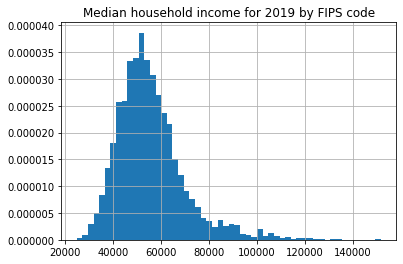

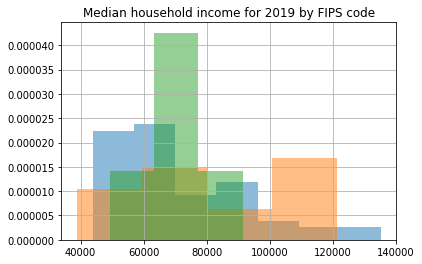

In [183]:
# Pooled density of education level across the country -- idea is that there may be distinct clusters
def pd_hist(data, hist_args=dict()):
    hist_args.update({'density': True})
    n_bins = int(np.sqrt(len(np.unique(data.dropna().values))))
    data.hist(bins=n_bins, **hist_args)
    return

plt.figure()
pd_hist(census_data['Median_Household_Income_2019'])
plt.title('Median household income for 2019 by FIPS code')

plt.figure()
pd_hist(census_data[census_data['state_code'].isin(['CA'])]['Median_Household_Income_2019'],{'alpha':0.5})
pd_hist(census_data[census_data['state_code'].isin(['MD'])]['Median_Household_Income_2019'],{'alpha':0.5})
pd_hist(census_data[census_data['state_code'].isin(['NH'])]['Median_Household_Income_2019'],{'alpha':0.5})
plt.title('Median household income for 2019 by FIPS code')

,FIPS_Code,state_code,county_name,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
171,6001,CA,Alameda,0.0,1510271,1510258,1512986,1530915,1553764,1579593,...,841075,815889,25186,3.0,813807.0,742411.0,71396.0,8.8,107589.0,133.8
172,6003,CA,Alpine,5.0,1175,1175,1161,1093,1110,1128,...,541,512,29,5.4,517.0,459.0,58.0,11.2,58112.0,72.3
173,6005,CA,Amador,4.0,38091,38091,37886,37543,37104,36620,...,14801,14217,584,3.9,14424.0,13107.0,1317.0,9.1,62640.0,77.9
174,6007,CA,Butte,0.0,220000,220005,219949,219975,220869,221641,...,97922,92858,5064,5.2,92604.0,84095.0,8509.0,9.2,58394.0,72.6
175,6009,CA,Calaveras,5.0,45578,45578,45468,45160,44815,44655,...,21310,20485,825,3.9,21207.0,19588.0,1619.0,7.6,68248.0,84.9
176,6011,CA,Colusa,1.0,21419,21407,21437,21323,21284,21250,...,10975,9549,1426,13.0,10499.0,8824.0,1675.0,16.0,59048.0,73.4
177,6013,CA,Contra Costa,0.0,1049025,1049204,1052540,1065440,1077548,1093401,...,559710,542121,17589,3.1,541256.0,493236.0,48020.0,8.9,106555.0,132.5
178,6015,CA,Del Norte,4.0,28610,28610,28566,28443,28190,27816,...,9617,9053,564,5.9,9350.0,8466.0,884.0,9.5,48979.0,60.9
179,6017,CA,El Dorado,5.0,181058,181058,181136,180936,180575,181481,...,92132,88833,3299,3.6,90752.0,83262.0,7490.0,8.3,86202.0,107.2
180,6019,CA,Fresno,0.0,930450,930507,932039,939406,945045,951514,...,450505,417312,33193,7.4,445518.0,395258.0,50260.0,11.3,56926.0,70.8


In [158]:
np.unique(census_data['state_code'].values)

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)